# Storytelling COVID-19

Initially, I just wanted to know how bad the situation in my country, the Netherlands, was compared to other countries as we had high numbers of confirmed cases and only 17 million inhabitants. In order to do so, I used the [Novel Corona Virus 2019 Dataset](https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset) and I uploaded my own dataset: [Countries of the World; ISO codes and population](https://www.kaggle.com/erikbruin/countries-of-the-world-iso-codes-and-population), and made plotly world maps based on the numbers of confirmed cases and deaths per million inhabitants.

After having done that, the pandemic unfortunately became worse and worse, and I wanted to investigate more. This version includes time series trends and also time series trends that start at the date of the first confirmed case/death reported ("Day Zero"). On April 12th, I wanted to add more insight on the situation in the US, and therefore added dataset [COVID-19 US County JHU Data & Demographics](https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics).

**Observations on May 5th**
*(Please be aware that this may be different if you fork and run this kernel, as the dataset is updated daily)*

- When looking at the number of death per million, Belgium is now the country with the highest number of Deaths per Million. However, if we would treat the US states as countries, the ranking would be as follows:
    - 1. New York State, 2. New Jersey 3. Belgium, 4. Connecticut, 5. Massachusetts, 6. Spain, 7 Italy
- The relative Death rates of New York are terrible. While countries such as Belgium, Italy and Spain have rates around 500-700 Death per Million, the state of New York has 1259 Deaths per Million , and New York City has 2242 Death per Million!

- Qatar is the country with most confirmed cases per million inhabitants. Most other countries in the "top" 10  of countries with the highest numbers of cases per million inhabitants are Western European countries, with the US at 5th place.

- The US is the country with the highest (absolute) number of confirmed cases and unfortunately the trend is steep upward. Over the past weeks the US has also passed Spain and Italy regarding the total number of Deaths.

- When looking the the time series of the cumulative numbers of deaths while taking the day of the first reported death as "Day Zero", we can see that China managed to flatten the curve while in Italy and Spain the number of victims really exploded after 15-20 days after the first casualty. Although more "delayed", the trend is now looking very bad for especially the US.

- Belarus, Saudi Arabia and United Arab Emirates are doing best when looking at the number of deadly victims relative to the number of confirmed cases.

# Table of contents
* [1. Corona figures relative to country population](# 1.Corona-figures-relative-to-country-population)
  * [1.1 Adding country population to the COVID-19 figures](#1.1-Adding-country-population-to-the-COVID-19-figures)
  * [1.2 "Top" 10 countries with relatively most confirmed cases](#1.2-"Top"-10-countries-with-relatively-most-confirmed-cases)
  * [1.3 World map with Cases per Million for each country](#1.3-World-map-with-Cases-per-Million-for-each-country)
  * [1.4 "Top" 10 countries with relatively most deaths](#1.4-"Top"-10-countries-with-relatively-most-deaths)
  * [1.5 World map with Deaths per Million for each country](#1.5-World-map-with-Deaths-per-Million-for-each-country)
* [2. Bubble charts](#2.-Bubble-charts)
  * [2.1 World map: Bubble chart showing Confirmed Cases by Province/state](#2.1-World-map:-Bubble-chart-showing-Confirmed-Cases-by-Province/state)
  * [2.2 World map: Bubble chart showing Deaths by Province/state](#2.2-World-map:-Bubble-chart-showing-Deaths-by-Province/state)
* [3. Time series plots](#3.-Time-series-plots)
  * [3.1 Time series plot of the countries with most Confirmed cases](#3.1-Time-series-plot-of-the-countries-with-most-Confirmed-cases)
  * [3.2 Time series plot of the countries with most Deaths](#3.2-Time-series-plot-of-the-countries-with-most-Deaths)
  * [3.3 Time series plot of Deaths since day of first victim](#3.3-Time-series-plot-of-Deaths-since-day-of-first-victim)
* [4. Deaths relative to the number of confirmed cases](#4.-Deaths-relative-to-the-number-of-confirmed-cases)
* [5. US figures](#5.-US-figures)
  * [5.1 US figures by state](#5.1-US-figures-by-state)
  * [5.2 Relative Deaths by country when treating US states as countries too](#5.2-Relative-Deaths-by-country-when-treating-US-states-as-countries-too)
  * [5.3 New York City figures](#5.3-New-York-City-figures)

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', None)

import matplotlib.style as style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 150 #set figure size

from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
#import plotly.plotly as py
import plotly.graph_objs as go
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

import folium

#df = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_line_list_data.csv")
#COVID19_open_line_list = pd.read_csv("../input/novel-corona-virus-2019-dataset/COVID19_open_line_list.csv")
df = pd.read_csv("../input/novel-corona-virus-2019-dataset/covid_19_data.csv", parse_dates=['Last Update'])
df.rename(columns={'Country/Region':'Country'}, inplace=True)
df = df.drop(columns = ['SNo', "Last Update"]) #only confuses

df_conf = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_confirmed.csv")
df_conf.rename(columns={'Country/Region':'Country'}, inplace=True)

df_death = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_deaths.csv")
df_death.rename(columns={'Country/Region':'Country'}, inplace=True)
# time_series_covid_19_recovered = pd.read_csv("../input/novel-corona-virus-2019-dataset/time_series_covid_19_recovered.csv")
countries = pd.read_csv("../input/countries-of-the-world-iso-codes-and-population/countries_by_population_2019.csv")
countries_iso = pd.read_csv("../input/countries-of-the-world-iso-codes-and-population/country_codes_2020.csv")

us_covid = pd.read_csv('../input/covid19-us-county-jhu-data-demographics/covid_us_county.csv')
us_county = pd.read_csv('../input/covid19-us-county-jhu-data-demographics/us_county.csv')

# 1. Corona figures relative to country population

## 1.1 Adding country population to the COVID-19 figures

File "covid_19_data.csv" from dataset "Novel Corona Virus 2019 Dataset" contains info by day. Below, you can see a sample of this info. In most cases, the info is provided on the country level. However, especially for some large countries such as China and the US, numbers are specified on the Province/State level.

In [2]:
df.sample(5)

,ObservationDate,Province/State,Country,Confirmed,Deaths,Recovered
16356,04/18/2020,North Carolina,US,6328.0,187.0,0.0
2425,02/26/2020,NaN,Spain,13.0,0.0,2.0
14269,04/12/2020,NaN,Malawi,13.0,2.0,0.0
6000,03/16/2020,NaN,Armenia,52.0,0.0,0.0
21159,05/03/2020,New Caledonia,France,18.0,0.0,17.0


What I am looking for is the most recent, overall numbers for each country. If I just keep the most recent line, I do get the most recent, cumulative numbers per State/Country. All I have to do then is to consolidate those per Country (for instance add up all numbers of the US States).

Dataset [Countries of the World; ISO codes and population](https://www.kaggle.com/erikbruin/countries-of-the-world-iso-codes-and-population), uploaded by me, contains the number of inhabitants by country. As I want to use built-in geometries of plotly.express later on to plot numbers on a world map, I am also merging the three-letter ISO country code to the dataframe.

This enables me to add the population numbers and ISO codes to the dataframe with Corona figures by country, and calculate the 'Cases per million inhabitants' and 'Deaths per million inhabitants'. Below you can see a sample of the resulting dataframe.

In [3]:
#strip white spaces are there is one country (Azerbaijan) with a whitespace observation
df['Country'] = df['Country'].str.strip()

#fill missing Province/State with Country
df.loc[df['Province/State'].isnull(), 'Province/State'] = df.loc[df['Province/State'].isnull(), 'Country']

#keep most recent line per Province/State and Country
df.sort_values(['Country', 'Province/State', 'ObservationDate'], ascending = [True,True,False], inplace = True)
df = df.drop_duplicates(['Country', 'Province/State'], keep = "first")

#keep a copy for later on
df_state = df.copy()

df = df.drop(columns = "ObservationDate")

#groupby Country
df_country = df.groupby(['Country'], as_index=False)['Confirmed', 'Deaths'].sum()

#drop some columns
cols_to_drop = ['Rank', 'pop2018','GrowthRate', 'area', 'Density']
countries = countries.drop(columns = cols_to_drop)

#add ISO Alpha 3 code that I uploaded in another CSV
countries = countries.merge(countries_iso[['name', 'cca3']], on = ['name'], how = "left")

cols_to_rename = {'name': 'Country', 'pop2019': 'Population', 'cca3': 'ISO'}
countries = countries.rename(columns = cols_to_rename)

#just fixing the most important mismatches
countries_to_rename = {'US': 'United States',\
                       'Mainland China': 'China',\
                       'UK': 'United Kingdom',\
                       'Congo (Kinshasa)': 'DR Congo',\
                       'North Macedonia': 'Macedonia',\
                       'Republic of Ireland': 'Ireland',\
                       'Congo (Brazzaville)': 'Republic of the Congo'}

df_country['Country'] = df_country['Country'].replace(countries_to_rename)

df_country = df_country.merge(countries, on = "Country", how = "left")

#check mismatches
#df_country[df_country.ISO.isnull()].sort_values(['Confirmed'], ascending = False)

#dropping not matching countries, only small islands left
df_country = df_country.dropna()

#rounding population to millions with 2 digits, and creating two new columns
df_country['Population'] = round((df_country['Population']/1000),2)
df_country = df_country.rename(columns = {'Population': 'Population (million)'})
df_country['Cases per Million'] = round((df_country['Confirmed']/df_country['Population (million)']),2)
df_country['Deaths per Million'] = round((df_country['Deaths']/df_country['Population (million)']),2)

#filter out countries with less than a million population as for instance San Marino has extremely high figures on a very small population
df_country = df_country[(df_country['Population (million)'] > 1)]

df_country.sample(5)

,Country,Confirmed,Deaths,Population (million),ISO,Cases per Million,Deaths per Million
197,Thailand,2987.0,54.0,69.63,THA,42.90,0.78
65,Ethiopia,140.0,3.0,112.08,ETH,1.25,0.03
69,France,169588.0,25204.0,65.13,FRA,2603.84,386.98
213,Venezuela,357.0,10.0,28.52,VEN,12.52,0.35
76,Ghana,2719.0,18.0,30.42,GHA,89.38,0.59


# 1.2 "Top" 10 countries with relatively most confirmed cases

Final relative ranking sorted on 'Cases per Million' (10 countries with most cases per million only). In this list, countries with less than a million inhabitants are excluded.

On May 5th, Qatar is the country with most confirmed cases per million inhabitants. Most other countries in the "top" 10 of countries with the highest numbers of cases per million inhabitants are Western European countries, with the US at 5th place.

In [4]:
df_country = df_country.sort_values(['Cases per Million'], ascending = False).reset_index(drop=True)
df_country.drop(columns = ['ISO', 'Deaths', 'Deaths per Million']).head(10).style.background_gradient(cmap='Reds', subset = ['Cases per Million'])

,Country,Confirmed,Population (million),Cases per Million
0,Qatar,16191,2.83,5721.2
1,Spain,218011,46.74,4664.33
2,Ireland,21772,4.88,4461.48
3,Belgium,50267,11.54,4355.89
4,United States,1.18106e+06,329.06,3589.2
5,Italy,211938,60.55,3500.21
6,Switzerland,29981,8.59,3490.22
7,Singapore,18778,5.8,3237.59
8,United Kingdom,196852,67.53,2915.03
9,France,169588,65.13,2603.84


## 1.3 World map with Cases per Million for each country

**Hovering over the map below shows the info in a tooltip. You can also use the plotly icons to zoom in at for instance Europe**

This map is bigger and therefore better after running in the editor. Somehow, the width of the rendered notebooks is small on Kaggle. Please let me know if you know a way to increase this width!

In [5]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Cases per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona confirmed cases per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

## 1.4 "Top" 10 countries with relatively most deaths

Final relative ranking sorted on 'Deaths per Million'. Again, countries with less than a million inhabitants are excluded in this list.

Belgium has now passed the Spain and Italy, the countries with most Deaths per Million in the past weeks.



In [6]:
df_country = df_country.sort_values(['Deaths per Million'], ascending = False).reset_index(drop=True)

#save a copy
countries = df_country.copy()

df_country.drop(columns = ['ISO', 'Confirmed', 'Cases per Million']).head(10).style.background_gradient(cmap='Reds', subset = ['Deaths per Million'])

,Country,Deaths,Population (million),Deaths per Million
0,Belgium,7924,11.54,686.66
1,Spain,25428,46.74,544.03
2,Italy,29079,60.55,480.25
3,United Kingdom,29042,67.53,430.06
4,France,25204,65.13,386.98
5,Netherlands,5098,17.1,298.13
6,Sweden,2769,10.04,275.8
7,Ireland,1319,4.88,270.29
8,United States,68945,329.06,209.52
9,Switzerland,1784,8.59,207.68


## 1.5 World map with Deaths per Million for each country

**Hovering over the map below shows the info in a tooltip. You can also use the plotly tool to zoom in at for instance Europe**

In [7]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Deaths per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona deaths per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 750,
    height = 350,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

# 2. Bubble charts

As mentioned before, for some large countries such as China, the information is collected on the Province/State level. In the maps with the numbers per million inhabitants, China did not come out with very high averages. However, we all know that Hubei had very high numbers and I want to give some insight on this using a Bubble Chart.

## 2.1 World map: Bubble chart showing Confirmed Cases by Province/state

The CSV with the time series of confirmed cases contains coordinates that I can use to plot on a map, but I first want to check if the file is as up-to-date as the dataframe that I have used so far. To do so, I am only displaying the last 5 columns added and filtering on the Netherlands. It turns out that this file is updated less frequently. Depending on the day that I run this kernel the last column may be a couple of days back. Also, the last day/column is not always updated for each country (last column same numbers as day before).

In [8]:
#get names of first 4 and last 5 columns
cols_to_select = list(df_conf.columns[0:4]) + list(df_conf.columns[-6:])
df_conf.loc[(df_conf['Country'] == "Netherlands"), cols_to_select]

,Province/State,Country,Lat,Long,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20
166,Aruba,Netherlands,12.5186,-70.0358,100,100,100,100,100,100
167,Curacao,Netherlands,12.1696,-68.9900,16,16,16,16,16,16
168,Sint Maarten,Netherlands,18.0425,-63.0548,75,75,76,76,76,76
169,NaN,Netherlands,52.1326,5.2913,38802,39316,39791,40236,40571,40770
256,"Bonaire, Sint Eustatius and Saba",Netherlands,12.1784,-68.2385,5,5,6,6,6,6


Below I am preparing a dataframe in which I only keep the last date.

In [9]:
#only keep last date available
cols_to_keep = list(df_conf.columns[0:4]) + list(df_conf.columns[-1:])
df_conf_last = df_conf[cols_to_keep]
df_conf_last.columns.values[-1] = "Confirmed"

df_conf_last.head()

,Province/State,Country,Lat,Long,Confirmed
0,NaN,Afghanistan,33.0000,65.0000,2894
1,NaN,Albania,41.1533,20.1683,803
2,NaN,Algeria,28.0339,1.6596,4648
3,NaN,Andorra,42.5063,1.5218,750
4,NaN,Angola,-11.2027,17.8739,35


Below you can see the resulting bubble chart. The map is centered on China, but it is in fact a world map. You can for instance also move towards the Caribean to see the figures for some small islands that belong to countries such as France or the Netherlands.

In [10]:
#float required
df_conf_last['Confirmed'] = df_conf_last['Confirmed'].astype(float)

map1 = folium.Map(location=[30.6, 114], zoom_start=3) #US=[39,-98] Europe =[45, 5]

for i in range(0,len(df_conf_last)):
   folium.Circle(
      location=[df_conf_last.iloc[i]['Lat'], df_conf_last.iloc[i]['Long']],
      tooltip = "Country: "+df_conf_last.iloc[i]['Country']+"<br>Province/State: "+str(df_conf_last.iloc[i]['Province/State'])+"<br>Confirmed cases: "+str(df_conf_last.iloc[i]['Confirmed'].astype(int)),
      radius=df_conf_last.iloc[i]['Confirmed']*5,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map1)

map1

## 2.2 World map: Bubble chart showing Deaths by Province/state

Now, I am making the same visuals for the numbers of Deaths by country.

In [11]:
#only keep last date available
cols_to_keep = list(df_death.columns[0:4]) + list(df_death.columns[-1:])
df_death_last = df_death[cols_to_keep]
df_death_last.columns.values[-1] = "Death"

#float required
df_death_last['Death'] = df_death_last['Death'].astype(float)

map2 = folium.Map(location=[30.6, 114], zoom_start=3)

for i in range(0,len(df_death_last)):
   folium.Circle(
      location=[df_death_last.iloc[i]['Lat'], df_death_last.iloc[i]['Long']],
      tooltip = "Country: "+df_death_last.iloc[i]['Country']+"<br>Province/State: "+str(df_death_last.iloc[i]['Province/State'])+"<br>Deaths: "+str(df_death_last.iloc[i]['Death'].astype(int)),
      radius=df_death_last.iloc[i]['Death']*100,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map2)

map2

# 3. Time series plots

## 3.1 Time series plot of the countries with most Confirmed cases

Below, you can see this time series for the Top-x countries with most confirmed cases. Nothing is hard-coded, so the Top-x (x is specified in head(x) in the code) may show different countries if I run the notebook again tomorrow.

The most noticable country is now the US, as the number of confirmed cases shows a very steep upward curve and the US is now the country with the highest (absolute) number of confirmed cases.

In [12]:
ts_country = df_conf.drop(columns = ['Lat', 'Long', 'Province/State'])
ts_country = ts_country.groupby(['Country']).sum()

#get countries with most cases on last date in dataframe
ts_country = ts_country.sort_values(by = ts_country.columns[-1], ascending = False).head(7)
#drop last date as not always updated
#ts_country.drop(ts_country.columns[len(ts_country.columns)-1], axis=1, inplace=True)

ts_country.transpose().iplot(title = 'Time series of confirmed cases of countries with most confirmed cases')

## 3.2 Time series plot of the countries with most Deaths

Unfortunately, the steep upward trend of most countries is much worse than China and therefore very worrying. Especially for the US, the trend is steep upward over the past weeks.

In [13]:
ts_country = df_death.drop(columns = ['Lat', 'Long', 'Province/State'])
ts_country = ts_country.groupby(['Country']).sum()

#get countries with most cases on last date in dataframe
ts_country = ts_country.sort_values(by = ts_country.columns[-1], ascending = False).head(7)
#drop last date as not always updated
ts_country.drop(ts_country.columns[len(ts_country.columns)-1], axis=1, inplace=True)

ts_country.transpose().iplot(title = 'Time series of deaths of countries with most victims')

## 3.3 Time series plot of Deaths since day of first victim

As you can see, China managed to flatten the curve while in Italy and Spain the number of victims really exploded after 15-20 days after the first casualty. In addition, although more "delayed", the trend is also looking bad for countries such as France, the UK, and especially the US.

In [14]:
ts_country = ts_country.transpose()

df1 = ts_country.iloc[:,0].to_frame()
df1 = df1[df1.iloc[:,0] !=0].reset_index(drop=True)

for i in range(1,ts_country.shape[1]):
    df = ts_country.iloc[:,i].to_frame()
    df = df[df.iloc[:,0] !=0].reset_index(drop=True)
    df1 = pd.concat([df1, df], join='outer', axis=1)

    
df1.iplot(title = 'Time series of deaths since first victim', xTitle = 'Days since first reported Death', yTitle = 'Number of Deaths')

# 4. Deaths relative to the number of confirmed cases

Tables are filtered on countries with at least 100 Deaths. Italy has the highest ratio, and countries like Algeria and Mexico are somewhat surprisingly in the Top 10. I assume that this may be due to relatively low testing activity.

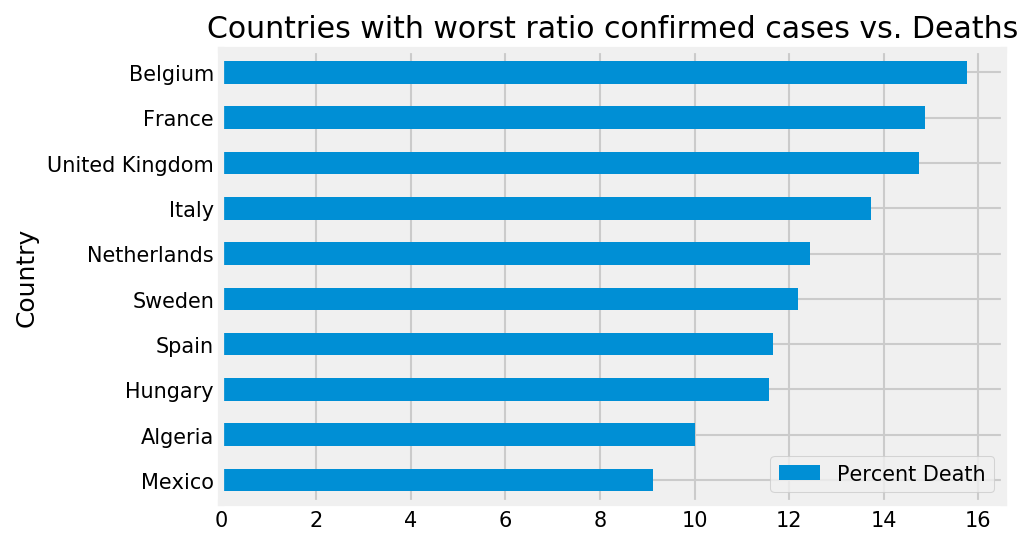

In [15]:
df_country = df_country.drop(columns = ['Population (million)', 'ISO', 'Cases per Million', 'Deaths per Million'])
df_country['Percent Death'] = round(((df_country.Deaths / df_country.Confirmed)*100),2)
#filter countries with at least 100 deaths
df_country = df_country[(df_country.Deaths >= 100)]

#set font size for plotting
#plt.rcParams.update({'font.size': 12})

#create barplot
se = df_country[['Country', 'Percent Death']].sort_values(by = "Percent Death", ascending = False).set_index("Country")
se = se[0:10].sort_values(by = "Percent Death", ascending = True)
se.plot.barh()
plt.title("Countries with worst ratio confirmed cases vs. Deaths")
plt.xticks(rotation=0);

Belarus, Saudi Arabia and United Arab Emirates are doing best when looking at the number of deadly victims relative to the number of confirmed cases. Regarding the rich countries, Saudi Arabia and the United Arab Emirates, I suspect that this may be due to a high level of testing.

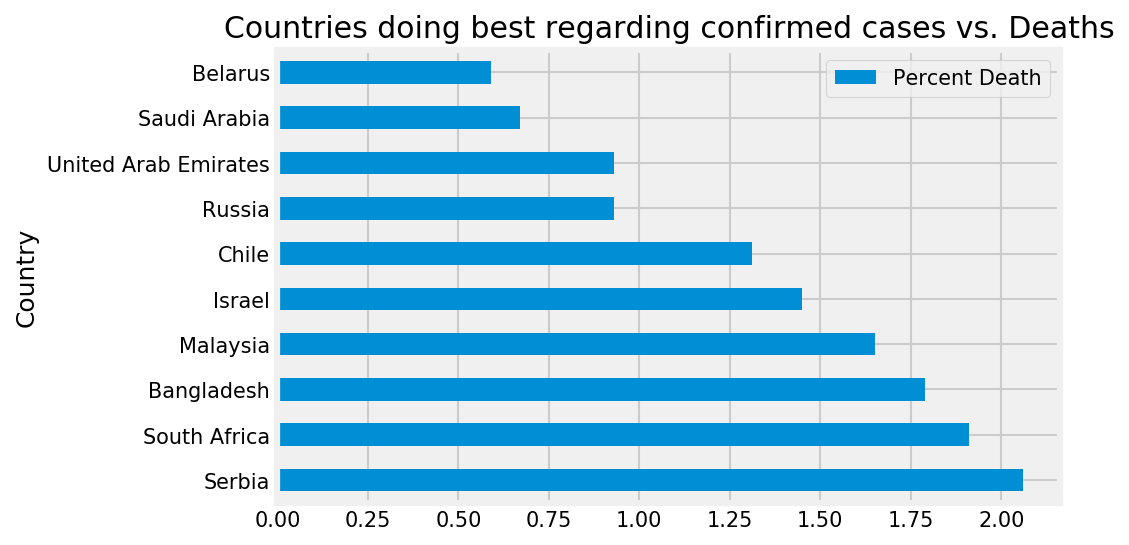

In [16]:
#create barplot
se = df_country[['Country', 'Percent Death']].sort_values(by = "Percent Death", ascending = False).set_index("Country")
se = se[-10:]
se.plot.barh()
plt.title("Countries doing best regarding confirmed cases vs. Deaths")
plt.xticks(rotation=0);

# 5. US figures

## 5.1 US figures by state

As New York is mentioned in the news as the new epicentre of the pandemic, I wanted to look into this is more detail. When I started this kernel, the 'Novel Corona Virus 2019 Dataset' had numbers by US county. However, as you can see in my Bubble charts, those are not maintained anymore. Fortunately, Heads or Tails uploaded a dataset on the US that he updates daily: [COVID-19 US County JHU Data & Demographic](COVID-19 US County JHU Data & Demographic).

The dataset consists of two csv's and a shapefile of the US counties. In the next version, I will use the shapefile to make maps, but for now I will focus on extracting some key figures. The cases and deaths are cumulative. Therefore, I will only keep the most recent date for each county/state combination.

In [17]:
#fips of 2 counties are missing (Dukes and Nantucket, Kansas City)
#quick fix for now
us_covid = us_covid[us_covid.fips.notnull()]
us_covid['fips'] = us_covid['fips'].astype(object)
us_county['fips'] = us_county['fips'].astype(object)

#add popultation from second csv
us_covid = us_covid.merge(us_county[['fips', 'population']], on = ['fips'], how = "left")

#keep latest date only
us_cum = us_covid.sort_values(by = ['county', 'state', 'date'], ascending = [True, True, False])
us_cum = us_cum.drop_duplicates(subset = ['county', 'state'], keep = "first")

#save a copy
counties_us = us_cum.copy()

#groupby State
us_cum = us_cum.groupby(['state', 'date'], as_index=False)['cases', 'deaths', 'population'].sum()

us_cum['population'] = us_cum['population'].astype(int)

#rounding population to millions with 2 digits, and creating two new columns
us_cum['population'] = round((us_cum['population']/1000000),2)
us_cum = us_cum.rename(columns = {'population': 'Population (million)'})
us_cum['Cases per Million'] = round((us_cum['cases']/us_cum['Population (million)']),2)
us_cum['Deaths per Million'] = round((us_cum['deaths']/us_cum['Population (million)']),2)

#remove states with missing population
us_cum = us_cum[(us_cum['Population (million)'] != 0)]

As you can see, the state of New York has 1259 Deaths per Million. This is worse than the country with most Deaths per Million!

In [18]:
us_cum = us_cum.sort_values(by = "Deaths per Million", ascending = False).reset_index(drop=True)
us_cum.head(10).style.background_gradient(cmap='Reds', subset = ['Deaths per Million'])

,state,date,cases,deaths,Population (million),Cases per Million,Deaths per Million
0,New York,2020-05-04,318953,24999,19.62,16256.5,1274.16
1,New Jersey,2020-05-04,128269,7910,8.88,14444.7,890.77
2,Connecticut,2020-05-04,29973,2556,3.58,8372.35,713.97
3,Massachusetts,2020-05-04,69055,4089,6.83,10110.5,598.68
4,Louisiana,2020-05-04,29673,2064,4.66,6367.6,442.92
5,Michigan,2020-05-04,42025,4092,9.96,4219.38,410.84
6,District of Columbia,2020-05-04,5170,258,0.68,7602.94,379.41
7,Rhode Island,2020-05-04,9652,341,1.06,9105.66,321.7
8,Pennsylvania,2020-05-04,52816,2838,12.79,4129.48,221.89
9,Maryland,2020-05-04,26408,1317,6,4401.33,219.5


Below you can see the Deaths per Million on a map.

In [19]:
url = '../input/usa-states'
state_geo = f'{url}/usa-states.json'

bins = list(us_cum['Deaths per Million'].quantile([0, 0.5, 0.75, 0.90, 0.95, 1]))

map3 = folium.Map(location=[37, -102], zoom_start=4)

choropleth = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=us_cum,
    columns=['state', 'Deaths per Million'],
    key_on='properties.name',
    fill_color= 'YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Deaths per Million',
    bins = bins,
    reset = True
).add_to(map3)

style_function = "font-size: 15px; font-weight: bold"
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'],style=style_function, labels=False)
)

map3

## 5.2 Relative Deaths by country when treating US states as countries too

In [20]:
us_cum = us_cum[['state', 'deaths', 'Population (million)', 'Deaths per Million']]
us_cum = us_cum.rename(columns = {'state': 'Country or US State', 'deaths': 'Deaths'})

countries = countries.drop(columns = ['ISO', 'Confirmed', 'Cases per Million'])
countries = countries.rename(columns = {'Country': 'Country or US State'})

countries = pd.concat([us_cum, countries], ignore_index = True)
countries = countries.sort_values(by = 'Deaths per Million', ascending = False).reset_index(drop=True)
countries.head(10).style.background_gradient(cmap='Reds', subset = ['Deaths per Million'])

,Country or US State,Deaths,Population (million),Deaths per Million
0,New York,24999,19.62,1274.16
1,New Jersey,7910,8.88,890.77
2,Connecticut,2556,3.58,713.97
3,Belgium,7924,11.54,686.66
4,Massachusetts,4089,6.83,598.68
5,Spain,25428,46.74,544.03
6,Italy,29079,60.55,480.25
7,Louisiana,2064,4.66,442.92
8,United Kingdom,29042,67.53,430.06
9,Michigan,4092,9.96,410.84


## 5.3 New York City figures

The next thing that I wanted to do is to dive deeper into the figures of New York City, which consists of 5 boroughs: Manhattan, Queens, the Bronx, Brooklyn and Staten Island. However, the county names of the counties of those boroughs are in some cases different:

* Manhattan: New York County
* Brooklyn: Kings County
* Queens: Queens County
* Bronx: Bronx County
* Staten Island: Richmond County

Unfortunately, as you can see, all cases and deaths have been assigned to county New York, which actually is Manhattan!


In [21]:
nyc_counties = ['New York', 'Kings', 'Queens', 'Bronx', 'Richmond']
new_york = counties_us[((counties_us.state == "New York") & (counties_us.county.isin(nyc_counties)))].sort_values(by="fips")
new_york

,fips,county,state,lat,long,date,cases,state_code,deaths,population
190943,36005,Bronx,New York,40.852093,-73.862828,2020-05-04,0,NY,0,1437872.0
193127,36047,Kings,New York,40.636183,-73.949356,2020-05-04,0,NY,0,2600747.0
193855,36061,New York,New York,40.767273,-73.971526,2020-05-04,175651,NY,19057,1632480.0
194895,36081,Queens,New York,40.710881,-73.816847,2020-05-04,0,NY,0,2298513.0
195103,36085,Richmond,New York,40.585822,-74.148086,2020-05-04,0,NY,0,474101.0


Therefore, unfortunately no insights yet on the figures by borough. All I can do for now is what the total numbers for NYC look like. As you can see, the Deaths per Million is 2242, which is again way worse than the state of New York average.

In [22]:
nyc = new_york.groupby(['state', 'date'])['cases', 'deaths', 'population'].sum()
nyc.index.names = ['city', 'date']

nyc['population'] = nyc['population'].astype(int)

#rounding population to millions with 2 digits, and creating two new columns
nyc['population'] = round((nyc['population']/1000000),2)
nyc = nyc.rename(columns = {'population': 'Population (million)'})
nyc['Cases per Million'] = round((nyc['cases']/nyc['Population (million)']),2).astype(int)
nyc['Deaths per Million'] = round((nyc['deaths']/nyc['Population (million)']),2).astype(int)

nyc

,,cases,deaths,Population (million),Cases per Million,Deaths per Million
city,date,,,,,
New York,2020-05-04,175651,19057,8.44,20811,2257
